# Process Study Results

In [1]:
import pandas as pd
import os
import json

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

In [2]:
verbose = True

NUMBER_OF_CASES = 3

### Load study results into dataframes

Load `.json` files into python dictionnaries

In [3]:
# Define the path to the folder containing JSON files
folder_path = 'results'

# Initialize a list to store the dictionaries
json_dicts = []

# Iterate over all files in the specified folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)
            json_dicts.append(data)

In [4]:
if verbose:
    # Print the list of dictionaries
    for i, json_dict in enumerate(json_dicts):
        print(f"Dictionary {i+1}: {json_dict}")

Dictionary 1: {'group': 'Group.CONTROL', 'model': 'gpt-4o', 'background': 'Resident', 'domain_experience': '10-14 years', 'llm_usage': 'I have tried such tools before, but do not use them regularly', 'ai_study': 'No', 'ai_trust_before_0': 4, 'ai_trust_before_1': 4, 'ai_trust_before_2': 2, 'ai_trust_before_3': 2, 'ai_trust_before_4': 1, 'ai_trust_before_5': 2, 'ai_trust_before_6': 4, 'ai_trust_before_7': 3, 'case_0_start_time': '15:01:21.520309', 'case_0_hypotheses': {'edited_rows': {}, 'added_rows': [], 'deleted_rows': []}, 'case_0_end_time': '15:01:13.520336', 'case_0_confidence_level': 4, 'case_0_contentment_level': 4, 'case_1_start_time': '15:01:21.520341', 'case_1_hypotheses': {'edited_rows': {}, 'added_rows': [], 'deleted_rows': []}, 'case_1_end_time': '15:01:21.520343', 'case_1_confidence_level': 4, 'case_1_contentment_level': 5, 'case_2_start_time': '15:01:14.520346', 'case_2_hypotheses': {'edited_rows': {}, 'added_rows': [], 'deleted_rows': []}, 'case_2_end_time': '15:01:21.520

Create a pandas `DataFrame` with those dictionnaries

In [5]:
df = pd.DataFrame(json_dicts)

In [6]:
if verbose:
    df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   group                     18 non-null     object
 1   model                     18 non-null     object
 2   background                18 non-null     object
 3   domain_experience         18 non-null     object
 4   llm_usage                 18 non-null     object
 5   ai_study                  18 non-null     object
 6   ai_trust_before_0         18 non-null     int64 
 7   ai_trust_before_1         18 non-null     int64 
 8   ai_trust_before_2         18 non-null     int64 
 9   ai_trust_before_3         18 non-null     int64 
 10  ai_trust_before_4         18 non-null     int64 
 11  ai_trust_before_5         18 non-null     int64 
 12  ai_trust_before_6         18 non-null     int64 
 13  ai_trust_before_7         18 non-null     int64 
 14  case_0_start_time         18

In [7]:
if verbose:
    display(df.head())

,group,model,background,domain_experience,llm_usage,ai_study,ai_trust_before_0,ai_trust_before_1,ai_trust_before_2,ai_trust_before_3,...,agency,mental_demand,ai_trust_after_0,ai_trust_after_1,ai_trust_after_2,ai_trust_after_3,ai_trust_after_4,ai_trust_after_5,ai_trust_after_6,ai_trust_after_7
0,Group.CONTROL,gpt-4o,Resident,10-14 years,"I have tried such tools before, but do not use...",No,4,4,2,2,...,3,2,1,1,3,3,2,3,1,3
1,Group.CONTROL,gpt-4o,Registrar,10-14 years,I use such tools regularly,No,2,3,4,2,...,4,3,2,3,4,2,3,4,2,3
2,Group.RECOMMENDATIONS_DRIVEN,gpt-4o,Resident,5-9 years,I have never used such tools before,Yes,3,2,4,3,...,2,2,4,3,4,3,2,4,3,4
3,Group.CONTROL,gpt-4o,Consultant,25+ years,"I have tried such tools before, but do not use...",Yes,1,4,2,2,...,4,3,2,2,4,4,1,4,1,1
4,Group.HYPOTHESIS_DRIVEN,gpt-4o,Registrar,5-9 years,"I have tried such tools before, but do not use...",No,3,2,2,3,...,5,5,1,2,3,2,1,1,4,3


### Add R-DEA scores

In [8]:
# Load the R-DEA scores located in the 'results' directory
r_dea = pd.read_csv('results/r_dea.csv')

# Append the columns of the new data to the existing DataFrame
# Ensure that both DataFrames have the same number of rows
if len(df) == len(r_dea):
    df = pd.concat([df, r_dea], axis=1)
else:
    raise ValueError("The number of rows in df and in R-DEA do not match.")

In [9]:
if verbose:
    display(r_dea.head())
    display(df.head())

,case_0_D,case_0_E,case_0_A,case_0_R-DEA,case_1_D,case_1_E,case_1_A,case_1_R-DEA,case_2_D,case_2_E,case_2_A,case_2_R-DEA
0,2,1,0,2,2,1,1,2,1,2,2,6
1,2,1,0,0,0,2,1,5,2,2,0,2
2,2,0,0,1,0,1,0,0,1,2,2,5
3,2,0,1,4,1,2,0,6,1,0,2,2
4,2,1,0,2,2,1,2,2,1,1,2,5


,group,model,background,domain_experience,llm_usage,ai_study,ai_trust_before_0,ai_trust_before_1,ai_trust_before_2,ai_trust_before_3,...,case_0_A,case_0_R-DEA,case_1_D,case_1_E,case_1_A,case_1_R-DEA,case_2_D,case_2_E,case_2_A,case_2_R-DEA
0,Group.CONTROL,gpt-4o,Resident,10-14 years,"I have tried such tools before, but do not use...",No,4,4,2,2,...,0,2,2,1,1,2,1,2,2,6
1,Group.CONTROL,gpt-4o,Registrar,10-14 years,I use such tools regularly,No,2,3,4,2,...,0,0,0,2,1,5,2,2,0,2
2,Group.RECOMMENDATIONS_DRIVEN,gpt-4o,Resident,5-9 years,I have never used such tools before,Yes,3,2,4,3,...,0,1,0,1,0,0,1,2,2,5
3,Group.CONTROL,gpt-4o,Consultant,25+ years,"I have tried such tools before, but do not use...",Yes,1,4,2,2,...,1,4,1,2,0,6,1,0,2,2
4,Group.HYPOTHESIS_DRIVEN,gpt-4o,Registrar,5-9 years,"I have tried such tools before, but do not use...",No,3,2,2,3,...,0,2,2,1,2,2,1,1,2,5


### Calculate some statistics

Get the mean of the trust questions before and after, and calculate the difference.

In [10]:
ai_trust_before_columns = [col for col in df.columns if "ai_trust_before" in col]
ai_trust_after_columns = [col for col in df.columns if "ai_trust_after" in col]

# Invert results of question 6
df["ai_trust_before_5"] = 6 - df["ai_trust_before_5"]
df["ai_trust_after_5"] = 6 - df["ai_trust_after_5"]

# Calculate the mean of the trust questions
df["ai_trust_before"] = df[ai_trust_before_columns].mean(axis=1)
df["ai_trust_after"] = df[ai_trust_after_columns].mean(axis=1)

# Calculate the difference in trust before and after
df["ai_trust_diff"] = df["ai_trust_after"] - df["ai_trust_before"]

In [11]:
if verbose:
    display(df[["ai_trust_before", "ai_trust_after", "ai_trust_diff"]].head())

,ai_trust_before,ai_trust_after,ai_trust_diff
0,3.000,2.125,-0.875
1,3.125,2.625,-0.500
2,2.625,3.125,0.500
3,2.750,2.125,-0.625
4,2.750,2.625,-0.125


Calculate the time it took to solve each case and and the mean duration

In [12]:
# For each case, calculate the time it took to solve it
for i in range(NUMBER_OF_CASES):
    df[f"case_{i}_time"] = pd.to_datetime(df[f"case_{i}_end_time"]) - pd.to_datetime(df[f"case_{i}_start_time"])

# Calculate the mean time to solve a case
df["mean_time"] = df[[f"case_{i}_time" for i in range(NUMBER_OF_CASES)]].mean(axis=1)

/var/folders/xv/2xj4c55x48x0cn76zgy_97440000gn/T/ipykernel_20258/462779885.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[f"case_{i}_time"] = pd.to_datetime(df[f"case_{i}_end_time"]) - pd.to_datetime(df[f"case_{i}_start_time"])
/var/folders/xv/2xj4c55x48x0cn76zgy_97440000gn/T/ipykernel_20258/462779885.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[f"case_{i}_time"] = pd.to_datetime(df[f"case_{i}_end_time"]) - pd.to_datetime(df[f"case_{i}_start_time"])
/var/folders/xv/2xj4c55x48x0cn76zgy_97440000gn/T/ipykernel_20258/462779885.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please s

In [13]:
if verbose:
    display(df[
        [f"case_{i}_time" for i in range(NUMBER_OF_CASES)] + ["mean_time"]
        ].head())

,case_0_time,case_1_time,case_2_time,mean_time
0,-1 days +23:59:52.000027,0 days 00:00:00.000002,0 days 00:00:07.000001,-1 days +23:59:59.666676667
1,0 days 00:00:02.469135,0 days 00:00:02.665556,0 days 00:00:01.777778,0 days 00:00:02.304156333
2,0 days 00:00:02.665556,0 days 00:00:01.888889,0 days 00:00:02.667777,0 days 00:00:02.407407333
3,0 days 00:00:02.000002,0 days 00:00:04.000001,0 days 00:00:00.000001,0 days 00:00:02.000001333
4,0 days 00:00:03.000005,-1 days +23:59:59.000002,0 days 00:00:01.000002,0 days 00:00:01.000003


Calculate the mean confidence and contentment

In [14]:
# Get the mean confidence and contentment
df["mean_confidence"] = df[[f"case_{i}_confidence_level" for i in range(NUMBER_OF_CASES)]].mean(axis=1)
df["mean_contentment"] = df[[f"case_{i}_contentment_level" for i in range(NUMBER_OF_CASES)]].mean(axis=1)

In [15]:
if verbose:
    display(df[["mean_confidence", "mean_contentment"]].head())

,mean_confidence,mean_contentment
0,3.333333,3.333333
1,3.000000,3.000000
2,3.000000,4.000000
3,1.666667,2.333333
4,3.000000,3.666667


Calculate the mean R-DEA score

In [16]:
# Get the mean R-DEA score
df["mean_r_dea"] = df[[f"case_{i}_R-DEA" for i in range(NUMBER_OF_CASES)]].mean(axis=1)

In [17]:
if verbose:
    display(df[["mean_r_dea"]].head())

,mean_r_dea
0,3.333333
1,2.333333
2,2.000000
3,4.000000
4,3.000000


### Keep only relevant columns

In [18]:
if verbose:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 62 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   group                     18 non-null     object         
 1   model                     18 non-null     object         
 2   background                18 non-null     object         
 3   domain_experience         18 non-null     object         
 4   llm_usage                 18 non-null     object         
 5   ai_study                  18 non-null     object         
 6   ai_trust_before_0         18 non-null     int64          
 7   ai_trust_before_1         18 non-null     int64          
 8   ai_trust_before_2         18 non-null     int64          
 9   ai_trust_before_3         18 non-null     int64          
 10  ai_trust_before_4         18 non-null     int64          
 11  ai_trust_before_5         18 non-null     int64          
 12  ai_trust_b

In [19]:
df = df[
    ["group",
     "background",
     "domain_experience",
     "llm_usage",
     "ai_study",
     "perceived_helpfulness",
     "agency",
     "mental_demand",
     "ai_trust_before",
     "ai_trust_after",
     "ai_trust_diff",
     "mean_time",
     "mean_confidence",
     "mean_contentment",
     "mean_r_dea"]]

mapping = {
    'Group.CONTROL': 'Control',
    'Group.HYPOTHESIS_DRIVEN': 'Hypothesis-driven AI',
    'Group.RECOMMENDATIONS_DRIVEN': 'Recommendations-driven AI'
}

df['group'] = df['group'].replace(mapping)

In [20]:
if verbose:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   group                  18 non-null     object         
 1   background             18 non-null     object         
 2   domain_experience      18 non-null     object         
 3   llm_usage              18 non-null     object         
 4   ai_study               18 non-null     object         
 5   perceived_helpfulness  18 non-null     int64          
 6   agency                 18 non-null     int64          
 7   mental_demand          18 non-null     int64          
 8   ai_trust_before        18 non-null     float64        
 9   ai_trust_after         18 non-null     float64        
 10  ai_trust_diff          18 non-null     float64        
 11  mean_time              18 non-null     timedelta64[ns]
 12  mean_confidence        18 non-null     float64      

In [21]:
if verbose:
    display(df.head())

,group,background,domain_experience,llm_usage,ai_study,perceived_helpfulness,agency,mental_demand,ai_trust_before,ai_trust_after,ai_trust_diff,mean_time,mean_confidence,mean_contentment,mean_r_dea
0,Control,Resident,10-14 years,"I have tried such tools before, but do not use...",No,1,3,2,3.000,2.125,-0.875,-1 days +23:59:59.666676667,3.333333,3.333333,3.333333
1,Control,Registrar,10-14 years,I use such tools regularly,No,3,4,3,3.125,2.625,-0.500,0 days 00:00:02.304156333,3.000000,3.000000,2.333333
2,Recommendations-driven AI,Resident,5-9 years,I have never used such tools before,Yes,4,2,2,2.625,3.125,0.500,0 days 00:00:02.407407333,3.000000,4.000000,2.000000
3,Control,Consultant,25+ years,"I have tried such tools before, but do not use...",Yes,5,4,3,2.750,2.125,-0.625,0 days 00:00:02.000001333,1.666667,2.333333,4.000000
4,Hypothesis-driven AI,Registrar,5-9 years,"I have tried such tools before, but do not use...",No,3,5,5,2.750,2.625,-0.125,0 days 00:00:01.000003,3.000000,3.666667,3.000000


#### R-DEA plot

Mean R-DEA score of each participant, grouped by condition

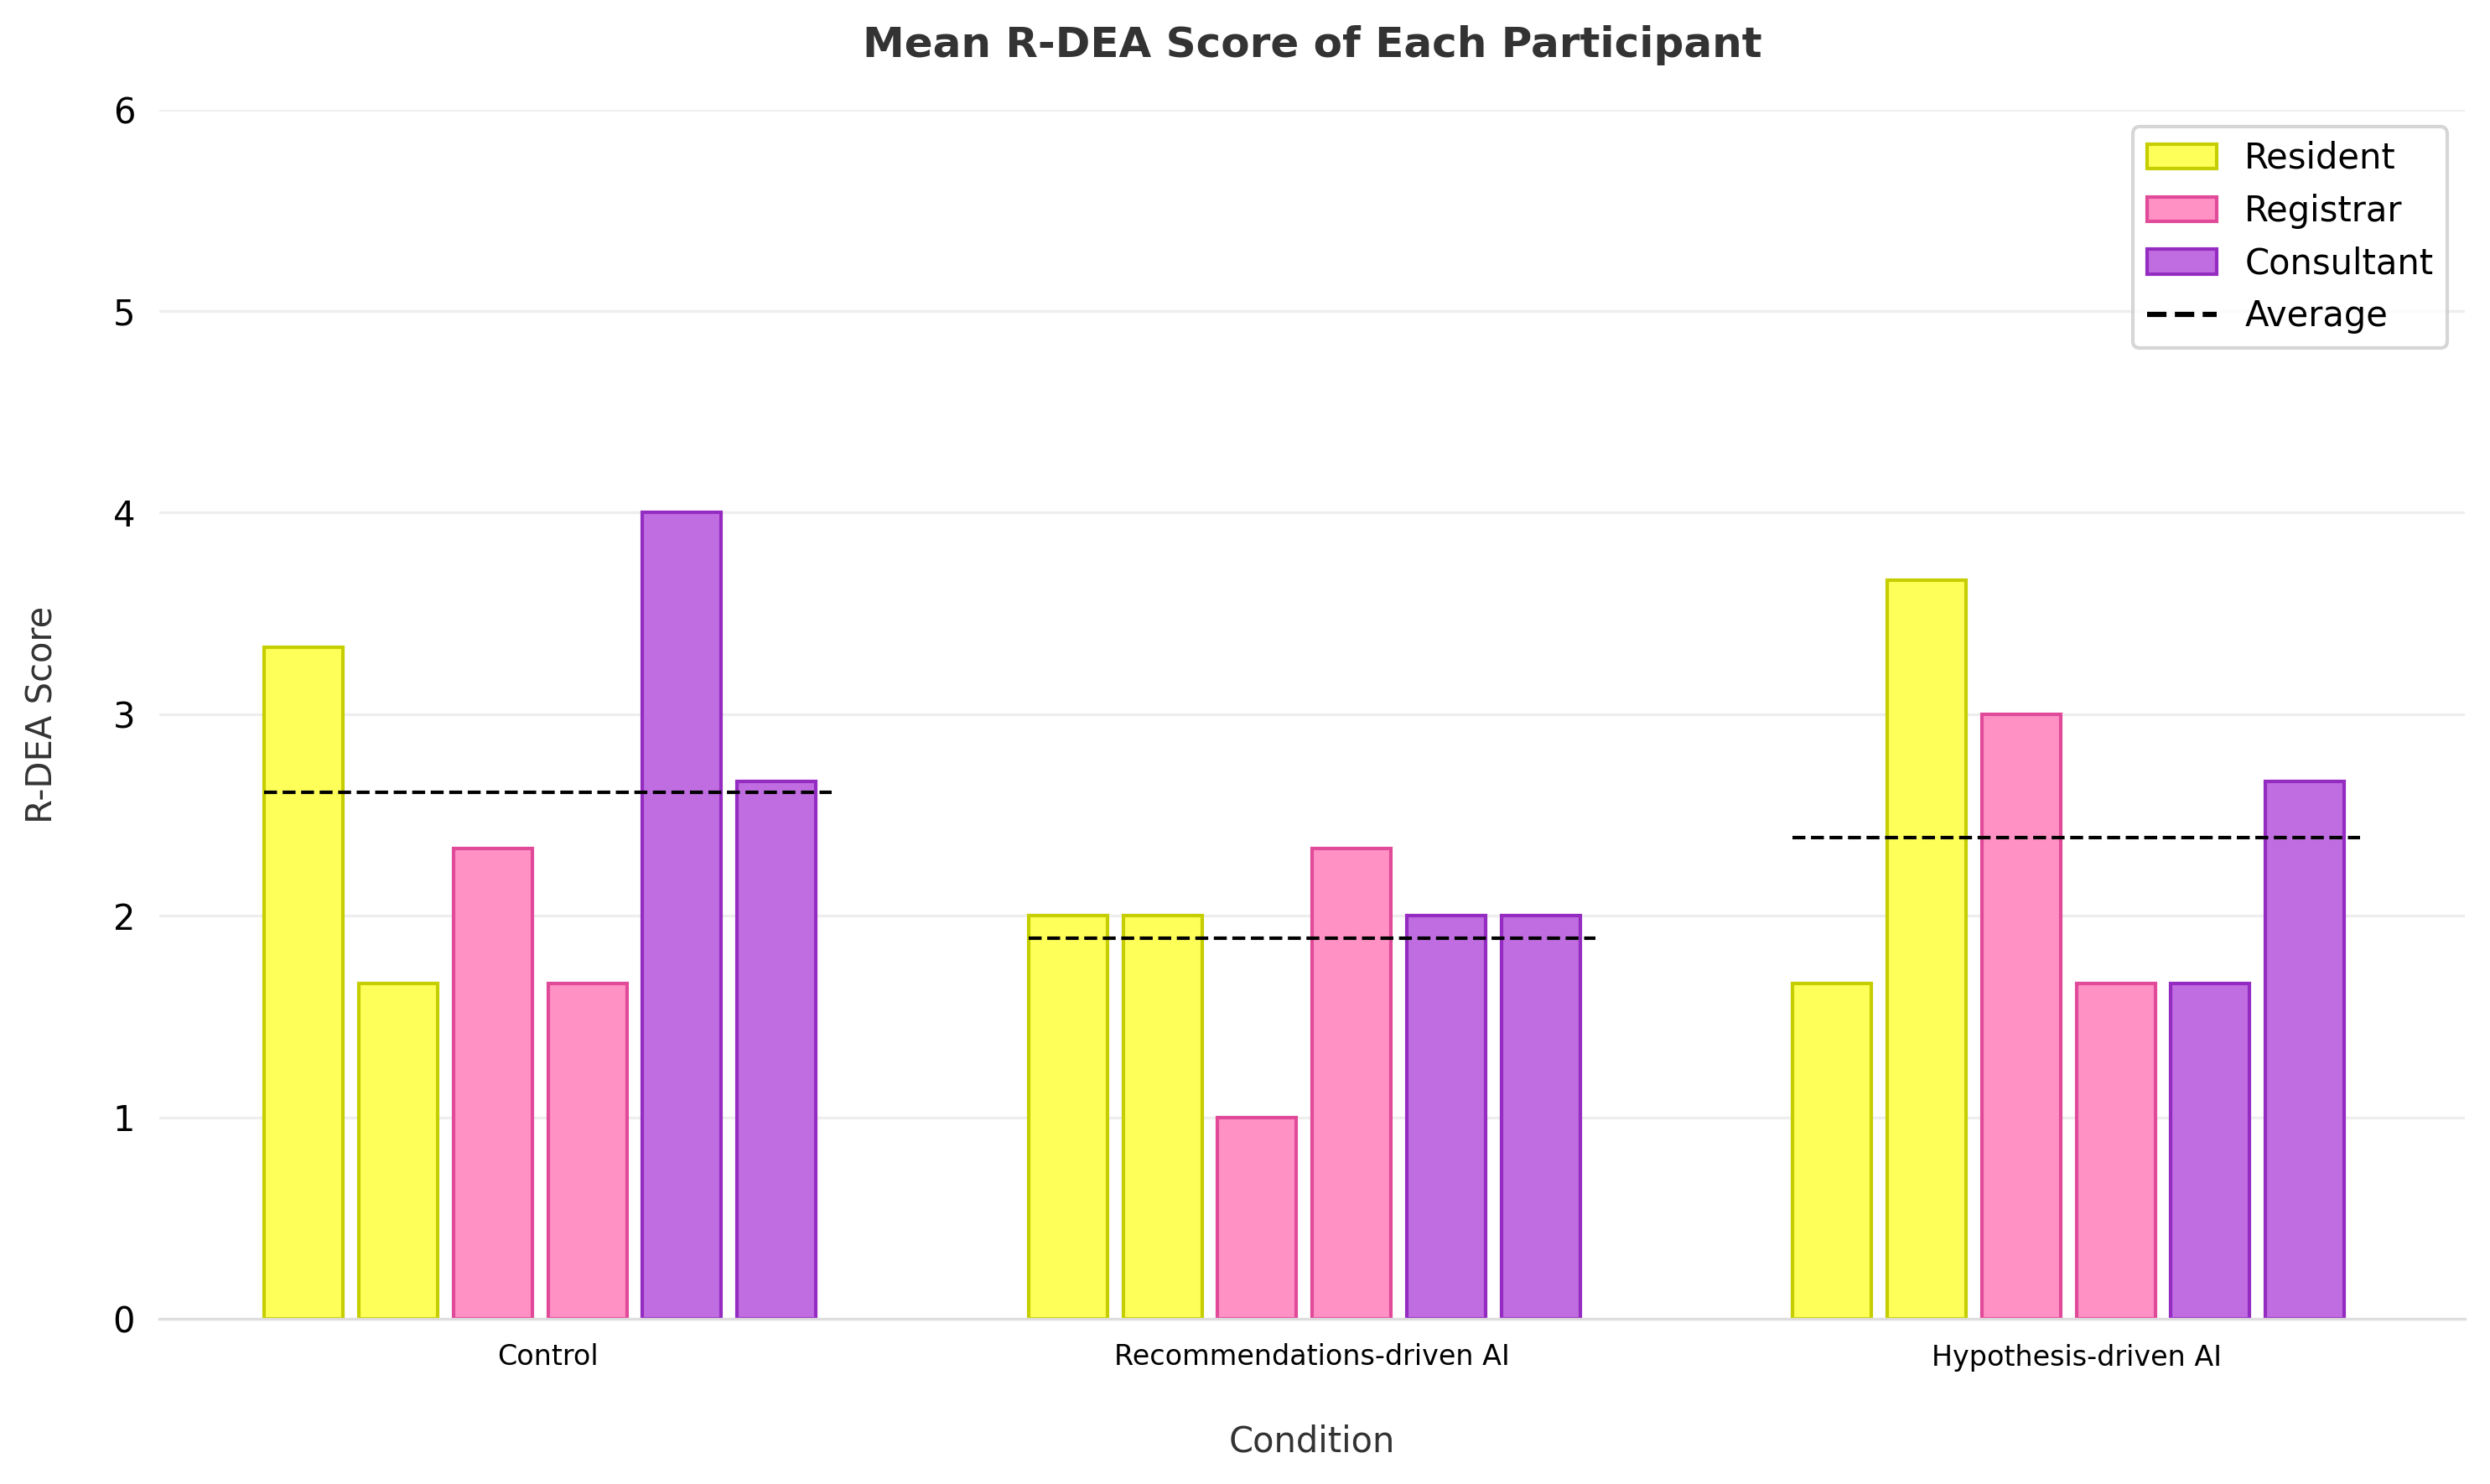

In [22]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# Calculate width and positions
bar_width = 0.2
bar_spacing = 0.04
group_spacing = 0.5
group_order = ['Control', 'Recommendations-driven AI', 'Hypothesis-driven AI']
background_order = ['Resident', 'Registrar', 'Consultant']

# Generate positions for bars with space between groups
positions = []
current_pos = 0
group_start_pos = {}
group_end_pos = {}
for group in group_order:
    group_data = df[df['group'] == group]
    group_start_pos[group] = current_pos
    for _ in range(len(group_data)):
        positions.append(current_pos)
        current_pos += bar_width + bar_spacing
    group_end_pos[group] = current_pos - bar_width
    current_pos += group_spacing  # Add space between groups

# Generate positions for x-ticks
x_ticks_pos = [
    (group_start_pos[group] + group_end_pos[group] + bar_width) / 2 
    for group in group_order]

# Define colors for each background
colors = {
    'Resident': '#ffff59',
    'Registrar': '#ff91c4',
    'Consultant': '#bf6de0'}
border_colors = {
    "Resident": "#c5ce00",
    "Registrar": "#e14a99",
    "Consultant": "#952cc2"}

# Plot each bar and ensure all backgrounds are included in the legend
# plotted_labels = set()
for group in group_order:
    for background in background_order:
        temp_df = df[(df['group'] == group) & (df['background'] == background)]
        if not temp_df.empty:
            color = colors[background]
            border_color = border_colors[background]
            # plotted_labels.add(background)
            for i, row in temp_df.iterrows():
                ax.bar(positions.pop(0),
                       row['mean_r_dea'],
                       width=bar_width,
                       align="edge",
                       color=color,
                       edgecolor=border_color,
                       label=background)

# Add average lines
for group in group_order:
    group_df = df[df['group'] == group]
    if not group_df.empty:
        average = group_df['mean_r_dea'].mean()
        ax.plot(
            [group_start_pos[group], group_end_pos[group] + bar_width], 
            [average, average], 
            linestyle='--', 
            color='black', 
            linewidth=1)

# Remove the top, right and left spines (figure borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Make the bottom spine gray instead of black.
ax.spines['bottom'].set_color('#DDDDDD')

# Add a legend with the colors of the bars.
handles = []
for background in background_order:
    handles.append(mpatches.Patch(
        facecolor=colors[background], 
        edgecolor=border_colors[background],
        label=background))
handles.append(mlines.Line2D([], [], linestyle='--', color='black', label='Average'))
ax.legend(handles=handles, title_fontsize='small', loc='upper right')

# Adjust the ticks.
ax.tick_params(bottom=False, left=False)
plt.xticks(x_ticks_pos, group_order, fontsize=8)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.set_ybound(lower=0, upper=6)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add labels and a title. Note the use of `labelpad` and `pad` to add some
# extra space between the text and the tick labels.
ax.set_xlabel("Condition", labelpad=15, color='#333333')
ax.set_ylabel("R-DEA Score", labelpad=15, color='#333333')
ax.set_title("Mean R-DEA Score of Each Participant", pad=15, color='#333333', weight='bold')

fig.tight_layout()

### Grouped-by Condition plots

In [23]:
group_averages = df.groupby('group')[
    ['ai_trust_diff',
     'mean_time',
     'mean_confidence',
     'mean_contentment']
    ].mean().reset_index()

In [24]:
if verbose:
    display(group_averages)

,group,ai_trust_diff,mean_time,mean_confidence,mean_contentment
0,Control,-0.645833,0 days 00:00:00.828473166,2.833333,2.388889
1,Hypothesis-driven AI,0.270833,0 days 00:00:00.633003777,2.833333,3.111111
2,Recommendations-driven AI,0.166667,0 days 00:00:01.123458444,2.888889,3.277778


In [25]:
def bar_plot(x, y, x_caption, y_caption, title):
    fig, ax = plt.subplots(figsize=(6, 6), dpi=100)

    ax.bar(x, y, color='#539caf', edgecolor='#007394')

    # First, let's remove the top, right and left spines (figure borders)
    # which really aren't necessary for a bar chart.
    # Also, make the bottom spine gray instead of black.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')

    # Second, remove the ticks as well.
    ax.tick_params(bottom=False, left=False)

    # Third, add a horizontal grid (but keep the vertical grid hidden).
    # Color the lines a light gray as well.
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)

    # Adjust the font size of the x-axis tick labels
    plt.xticks(fontsize=8)

    # Add labels and a title. Note the use of `labelpad` and `pad` to add some
    # extra space between the text and the tick labels.
    ax.set_xlabel(x_caption, labelpad=15, color='#333333')
    ax.set_ylabel(y_caption, labelpad=15, color='#333333')
    ax.set_title(title, pad=15, color='#333333', weight='bold')

    return fig.tight_layout()

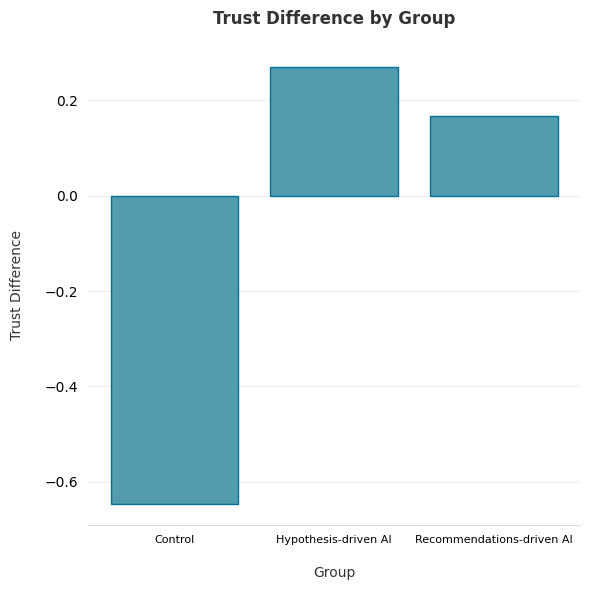

In [26]:
bar_plot(group_averages['group'], group_averages['ai_trust_diff'], 'Group', 'Trust Difference', 'Trust Difference by Group')

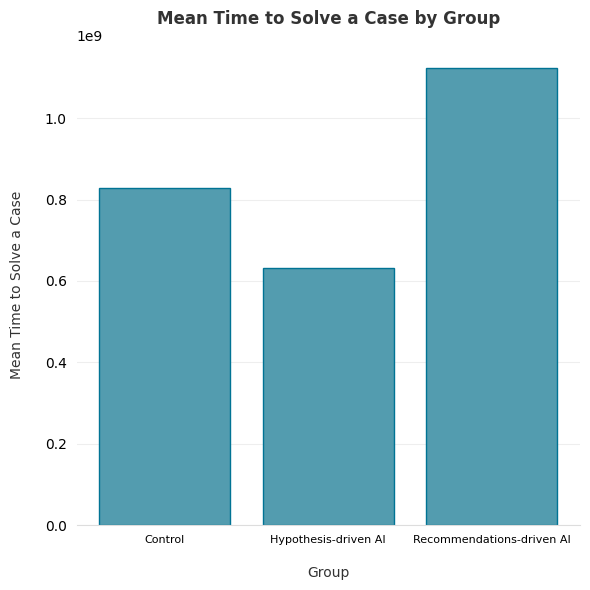

In [27]:
bar_plot(group_averages['group'], group_averages['mean_time'], 'Group', 'Mean Time to Solve a Case', 'Mean Time to Solve a Case by Group')

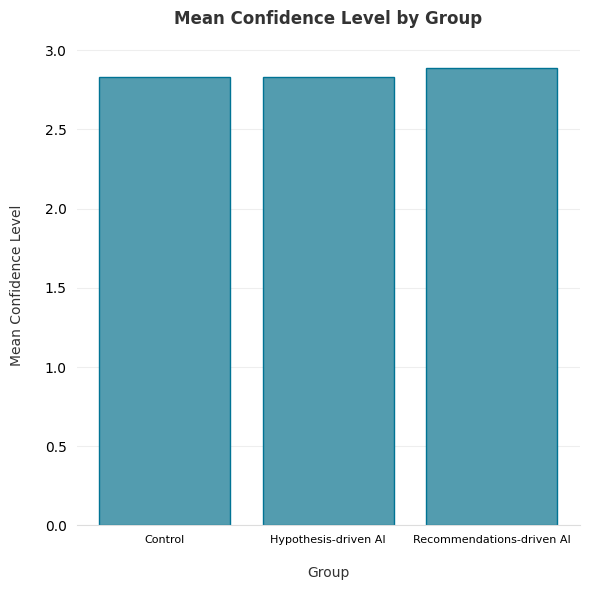

In [28]:
bar_plot(group_averages['group'], group_averages['mean_confidence'], 'Group', 'Mean Confidence Level', 'Mean Confidence Level by Group')

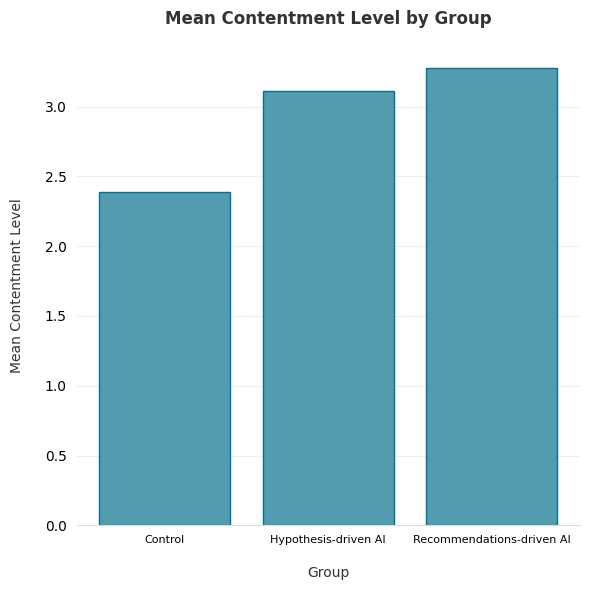

In [29]:
bar_plot(group_averages['group'], group_averages['mean_contentment'], 'Group', 'Mean Contentment Level', 'Mean Contentment Level by Group')